In [1]:
import pandas as pd
import warnings
import logging
# Data Loading
df = pd.read_csv("Training.csv")


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df["prognosis"])
df["prognosis"] = encoder.transform(df["prognosis"])

x = df.iloc[:, :-1]  # Features
y = df["prognosis"]  #target


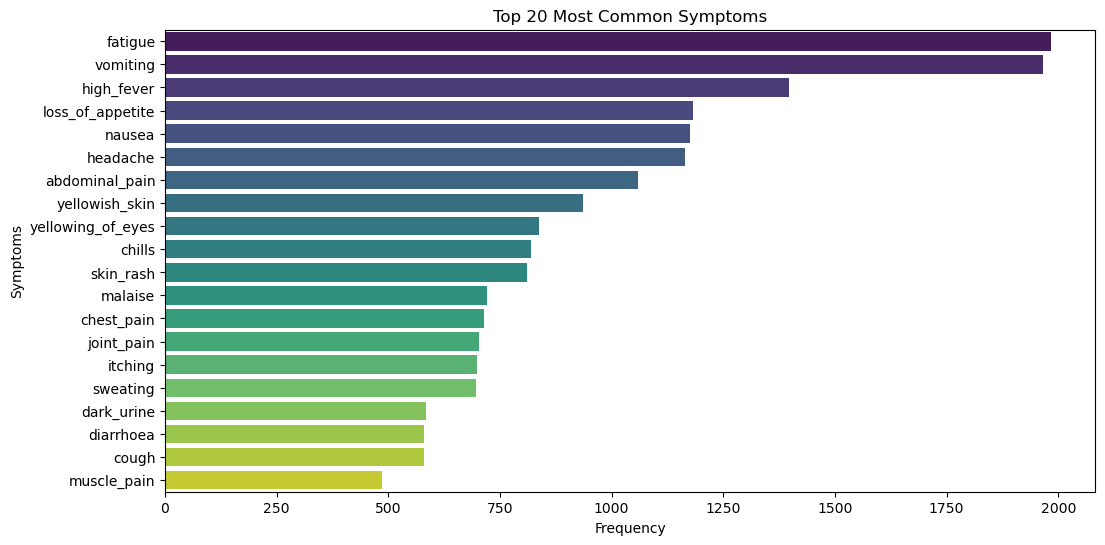

In [5]:
# Data Visualization (Graphs)

import matplotlib.pyplot as plt
import seaborn as sns

# Symptom Frequency Plot
symptom_counts = df.iloc[:, :-1].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, hue=symptom_counts.index, legend=False, palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Symptoms")
plt.title("Top 20 Most Common Symptoms")
plt.show()


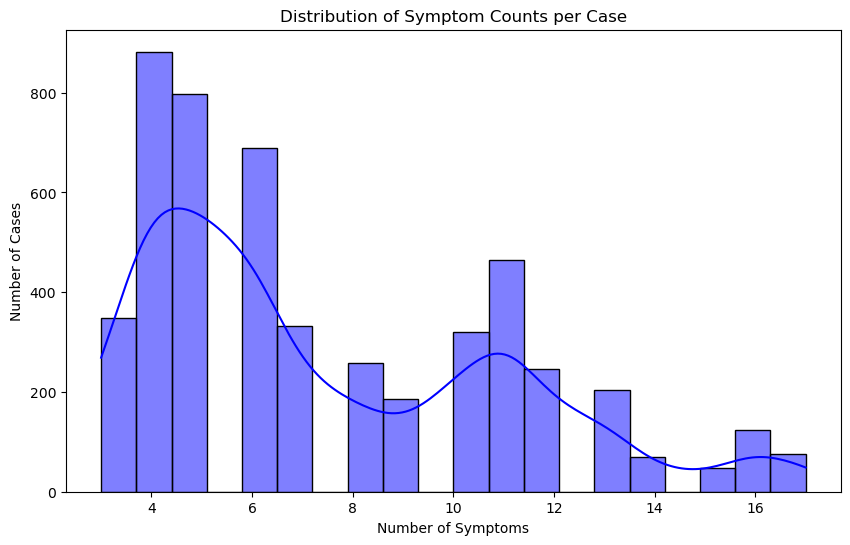

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the number of symptoms per case
df['symptom_count'] = df.iloc[:, :-1].sum(axis=1)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['symptom_count'], bins=20, kde=True, color="blue")
plt.xlabel("Number of Symptoms")
plt.ylabel("Number of Cases")
plt.title("Distribution of Symptom Counts per Case")
plt.show()

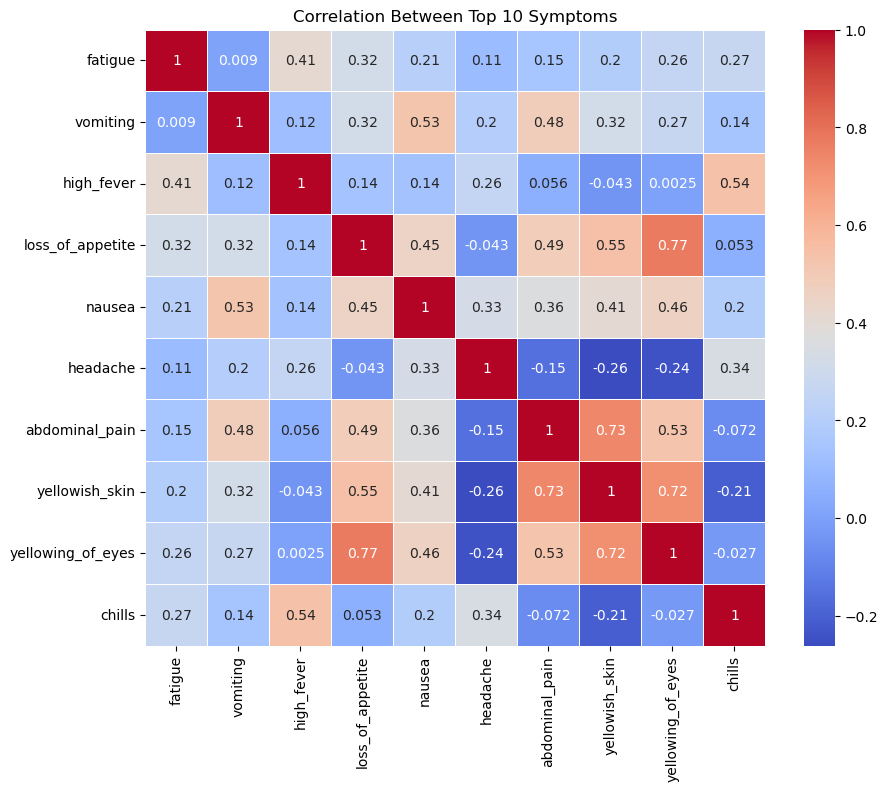

In [9]:
# Heatmap of Symptom Correlation (Top 10 Symptoms for readability)
top_symptoms = symptom_counts.index[:10]
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_symptoms].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Top 10 Symptoms")
plt.show()

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.40, random_state=142)


In [13]:
# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
# Make predictions
predictions = model.predict(x_test)

In [17]:
# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


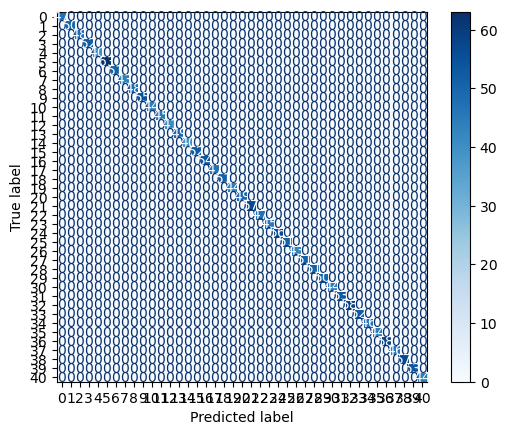

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Replace y_test and y_pred with your actual variable names
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [25]:
from sklearn.metrics import classification_report

# Replace y_test and y_pred with your actual variable names
report = classification_report(y_test, predictions)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        63
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        43
           8       1.00      1.00      1.00        48
           9       1.00      1.00      1.00        55
          10       1.00      1.00      1.00        44
          11       1.00      1.00      1.00        45
          12       1.00      1.00      1.00        41
          13       1.00      1.00      1.00        49
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        52
          16       1.00      1.00      1.00        54
          17       1.00    

In [11]:
import pandas as pd

# Load the CSV file
file_path = "Training.csv"  # Update with the correct file path if needed
data = pd.read_csv(file_path)

# Define the desired column order
desired_order = [
    "muscle_weakness", "stiff_neck", "swelling_joints", "movement_stiffness", "painful_walking",
    "muscle_pain", "knee_pain", "hip_joint_pain", "neck_pain", "back_pain", "muscle_wasting",
    "weakness_in_limbs", "joint_pain", "cramps", "dizziness", "irritability", "restlessness",
    "depression", "headache", "spinning_movements", "loss_of_balance", "altered_sensorium",
    "slurred_speech", "weakness_of_one_body_side", "lack_of_concentration", "mood_swings",
    "anxiety", "unsteadiness", "blackheads", "scurring", "skin_rash", "silver_like_dusting",
    "skin_peeling", "small_dents_in_nails", "blister", "red_sore_around_nose",
    "nodal_skin_eruptions", "yellowish_skin", "ulcers_on_tongue", "inflammatory_nails",
    "patches_in_throat", "drying_and_tingling_lips", "pus_filled_pimples", "dischromic_patches",
    "yellow_crust_ooze", "red_spots_over_body", "itching", "bruising", "internal_itching",
    "stomach_pain", "acidity", "vomiting", "indigestion", "constipation", "acute_liver_failure",
    "abdominal_pain", "diarrhoea", "nausea", "loss_of_appetite", "pain_during_bowel_movements",
    "pain_in_anal_region", "bloody_stool", "irritation_in_anus", "passage_of_gases",
    "belly_pain", "swelling_of_stomach", "distention_of_abdomen", "continuous_sneezing", "cough",
    "breathlessness", "phlegm", "sinus_pressure", "runny_nose", "congestion", "throat_irritation",
    "loss_of_smell", "mucoid_sputum", "rusty_sputum", "weight_gain", "weight_loss",
    "irregular_sugar_level", "lethargy", "fatigue", "cold_hands_and_feets", "increased_appetite",
    "excessive_hunger", "obesity", "enlarged_thyroid", "brittle_nails", "fast_heart_rate",
    "palpitations", "prominent_veins_on_calf", "chest_pain", "swollen_legs",
    "swollen_blood_vessels", "Varicose veins", "swollen_extremeties", "puffy_face_and_eyes",
    "burning_micturition", "spotting_urination", "dark_urine", "yellow_urine",
    "foul_smell_of_urine", "bladder_discomfort", "continuous_feel_of_urine", "polyuria",
    "high_fever", "mild_fever", "chills", "shivering", "malaise", "sweating", "dehydration",
    "toxic_look_(typhos)", "sunken_eyes", "swelled_lymph_nodes", "family_history",
    "blurred_and_distorted_vision", "redness_of_eyes", "visual_disturbances", "yellowing_of_eyes",
    "watering_from_eyes", "pain_behind_the_eyes", "extra_marital_contacts",
    "history_of_alcohol_consumption", "receiving_blood_transfusion",
    "receiving_unsterile_injections", "coma", "stomach_bleeding", "fluid_overload",
    "blood_in_sputum", "painful_walking", "prognosis"
]

# Ensure only existing columns are used
existing_columns = [col for col in desired_order if col in data.columns]

# Reorder the dataset
data_reordered = data[existing_columns]

# Save the reordered data
output_path = "Reordered_Training1.csv"
data_reordered.to_csv(output_path, index=False)

print(f"Reordered file saved as {output_path}")


Reordered file saved as Reordered_Training1.csv
